<a href="https://colab.research.google.com/github/ShubhamPatel01/Loan-Eligbility-Prediction/blob/main/Loan_Eligibilty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Eligibility Prediction Project


Submitted by:


*   Pushpit Jain  (N020)
*   Shubham Patel (N038)
*   Shiwansh Raj  (N040)
*   Shlok Sambre  (N042)





## Topic: Two step process which includes prediction for Credit History using random forest, and taking that credit history into consideration in calculating loan eligibility prediction using Logistic Regression , Naive Bayes Classifier and XG Boosting

---
# Part-A
## Prediction of that whether a person will face financial distress or not
This model uses a Kaggle dataset containing data about credit repayment difficulty rates among customers.

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience deep financial distress in the next two years. 

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this project is to  build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers.

---

The variables are the following:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse (Target variable / label)

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

---

We will be using a random forest classifier  because it would allow us to quickly and easily change the output to a simple binary classification problem.

---

In [ ]:
#Load required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import  train_test_split
from sklearn import metrics
import xgboost as xgb

## Exploratory Data Analysis

Reading training set and testing set and exploring the data set

In [ ]:
train = pd.read_csv("/content/cs-training.csv")
test = pd.read_csv("/content/cs-test.csv")

In [ ]:
train.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train.shape

(150000, 12)

In [ ]:
train.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
train.isnull().sum()

Id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

SeriousDlqin2yrs is the target variable (label), it is binary. It shows that whether person experiences 90 days past due or worse.

The training set contains 150,000 observations of 11 features and 1 label.

All of our features are numerical in nature.

NumberOfDependents and MonthlyIncome contain NaN values.

In [ ]:
test.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
test.isnull().sum()

Id                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

The test data also contains several NaN values

## Target distribution

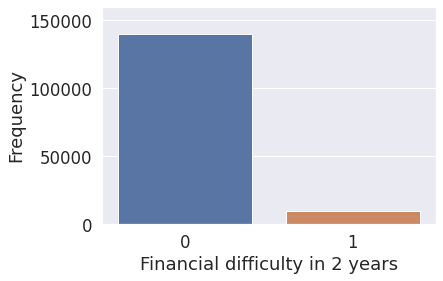

In [ ]:
ax = sns.countplot(x = train.SeriousDlqin2yrs)
sns.set(font_scale=1.5)
ax.set_ylim(top = 160000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
plt.show()

We can see that the distribution of our target variable is very skewed.

##Detecting and Treating outliers

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(train,2,["RevolvingUtilizationOfUnsecuredLines",
                                            "age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "DebtRatio",
                                            "MonthlyIncome",
                                            "NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "Id",
                                            "NumberOfDependents"])

In [ ]:
train.loc[Outliers_to_drop]

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
900,901,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN
1958,1959,0,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0
4852,4853,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
5956,5957,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117338,117339,1,0.960692,42,0,1.241580,3770.0,29,1,2,1,3.0
126682,126683,1,0.344297,38,0,1.789158,4500.0,23,14,11,1,0.0
129570,129571,0,0.075067,58,0,0.298925,17388.0,24,0,6,1,0.0
5833,5834,1,0.917527,44,0,1.852144,3800.0,13,1,7,1,1.0


We detected 3527 outliers in the training set, which represents only 2.53% of our training data. We will drop these outliers.

In [ ]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## Renaming Columns

In [ ]:
train = train.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

test = test.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

## Exploratory Data Analysis

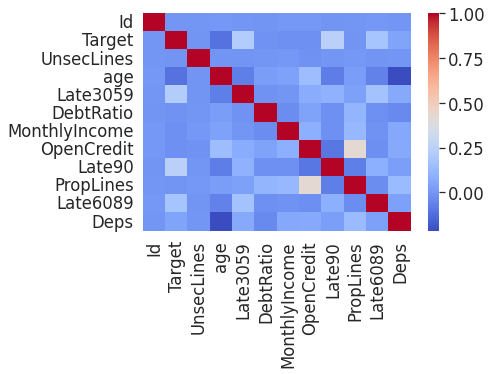

In [ ]:
g = sns.heatmap(train.corr(),fmt = ".2f", cmap = "coolwarm")

We can see that the Target has the highest correlation with previous late payments, and the number of dependents. But the correlation coefficient is not that significant. Hence, we will explore all variables along with target result.

## Exploring revolving utilization of unsecured lines

In [ ]:
train.UnsecLines.describe()

count    146473.000000
mean          5.933029
std         249.407744
min           0.000000
25%           0.028876
50%           0.146277
75%           0.530833
max       50708.000000
Name: UnsecLines, dtype: float64

In [ ]:
train.UnsecLines = pd.qcut(train.UnsecLines.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

Applying same qcut operation on test data set.

In [ ]:
test.UnsecLines = pd.qcut(test.UnsecLines.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

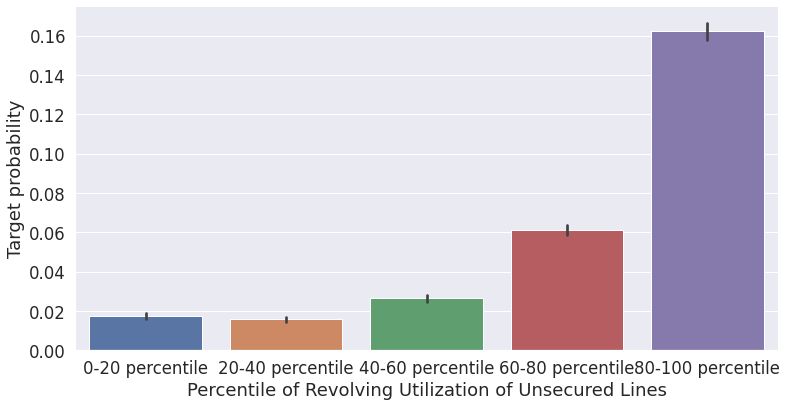

In [ ]:
g  = sns.factorplot(x="UnsecLines",y="Target",data=train,kind="bar",height=6, aspect=15/8)
g = g.set_ylabels("Target probability")
g = g.set_xlabels("Percentile of Revolving Utilization of Unsecured Lines")

We can that there is an almost exponential relationship between this variable and our target.

## Exploring Age

In [ ]:
train.age.describe()

count    146473.000000
mean         52.411735
std          14.784272
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

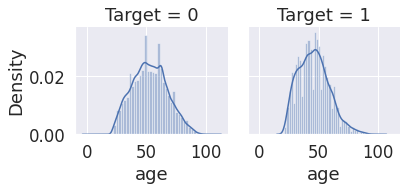

In [ ]:
g = sns.FacetGrid(train, col='Target') #facetgrid
g = g.map(sns.distplot, "age")

In [ ]:
train.age = pd.qcut(train.age.values, 5, labels=["Age: 0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

Applying same qcut operation on test data set.

In [ ]:
test.age = pd.qcut(test.age.values, 5, labels=["Age: 0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

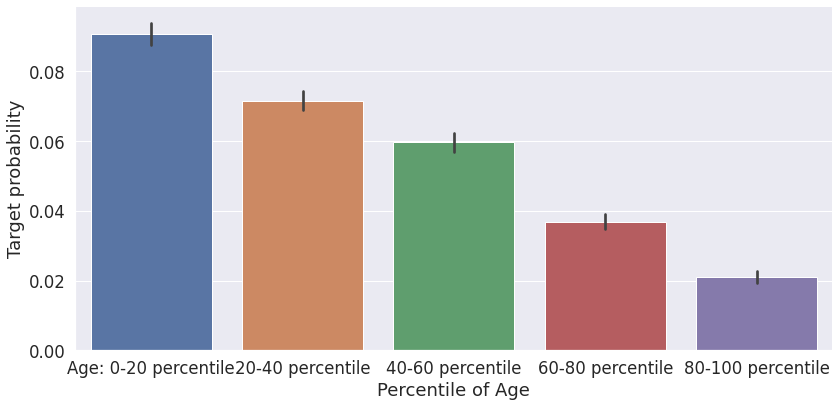

In [ ]:
g  = sns.factorplot(x="age",y="Target",data=train,kind="bar", height=6, aspect=16/8)
g = g.set_ylabels("Target probability")
g = g.set_xlabels("Percentile of Age")

We can see that age has an inverse relationship between target and age

## Exploring Late3059

In [ ]:
train.Late3059.describe()

count    146473.000000
mean          0.209547
std           0.623402
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: Late3059, dtype: float64

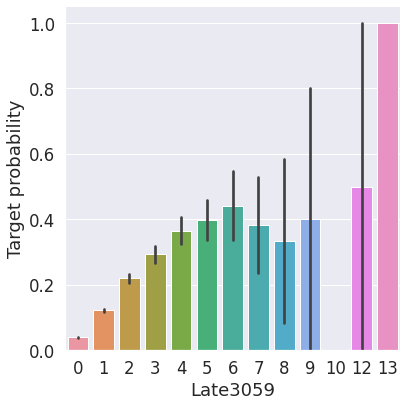

In [ ]:
g  = sns.factorplot(x="Late3059",y="Target",data=train,kind="bar", size = 6 )
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(train)):
    if train.Late3059[i] >= 6:
        train.Late3059[i] = 6

Applying same operation on test data set

In [ ]:
for i in range(len(test)):
    if test.Late3059[i] >= 6:
        test.Late3059[i] = 6

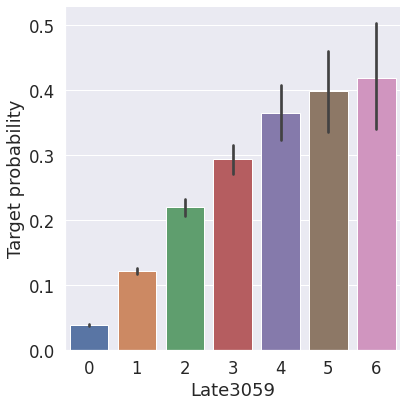

In [ ]:
g  = sns.factorplot(x="Late3059",y="Target",data=train,kind="bar", size = 6 )
g = g.set_ylabels("Target probability")

Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late3059. We will perform the same technique in some other late payments category also.

## Exploring DebtRatio

In [ ]:
train.DebtRatio.describe()

count    146473.000000
mean        339.363919
std        2026.556532
min           0.000000
25%           0.173638
50%           0.362659
75%           0.825963
max      329664.000000
Name: DebtRatio, dtype: float64

In [ ]:
train.DebtRatio = pd.qcut(train.DebtRatio.values, 5, labels=["Debt-Ratio: 0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

Applying same qcut operation on test data set.

In [ ]:
test.DebtRatio = pd.qcut(test.DebtRatio.values, 5, labels=["Debt-Ratio: 0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

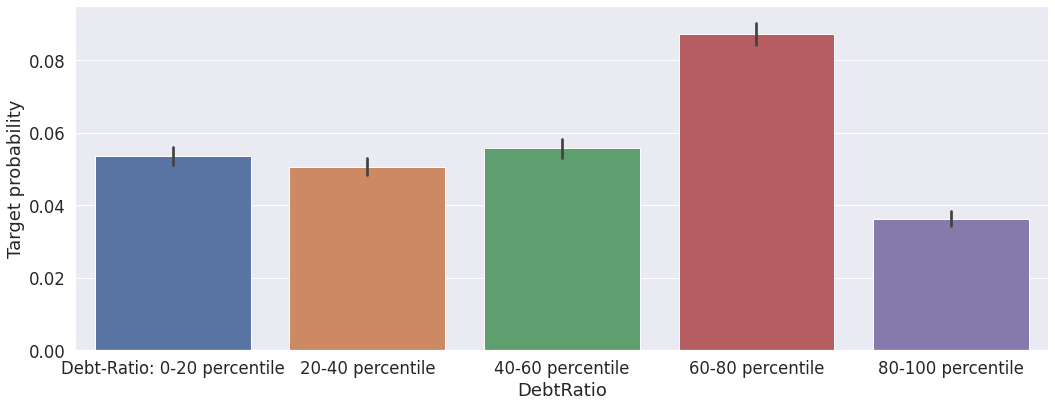

In [ ]:
g  = sns.factorplot(x="DebtRatio",y="Target",data=train,kind="bar" , height=6, aspect=15/6)
g = g.set_ylabels("Target probability")

We cannot infer much from the above graph. We can only see that highest probability that person will face difficulty in paying loan is between 60th and 80th percentile of Debt Ratio.

## Exploring MonthlyIncome

In [ ]:
train.MonthlyIncome.describe()

count    1.182240e+05
mean     6.688368e+03
std      1.446389e+04
min      0.000000e+00
25%      3.406000e+03
50%      5.416000e+03
75%      8.284000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:
train.MonthlyIncome.isnull().sum()

28249

In [ ]:
train.MonthlyIncome.median()

5416.0

In [ ]:
train.MonthlyIncome = train.MonthlyIncome.fillna(train.MonthlyIncome.median())

Applying same operation on test data set

In [ ]:
test.MonthlyIncome = test.MonthlyIncome.fillna(test.MonthlyIncome.median())

In [ ]:
train.MonthlyIncome = pd.qcut(train.MonthlyIncome.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

Applying same qcut operation on test data set.

In [ ]:
test.MonthlyIncome = pd.qcut(test.MonthlyIncome.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

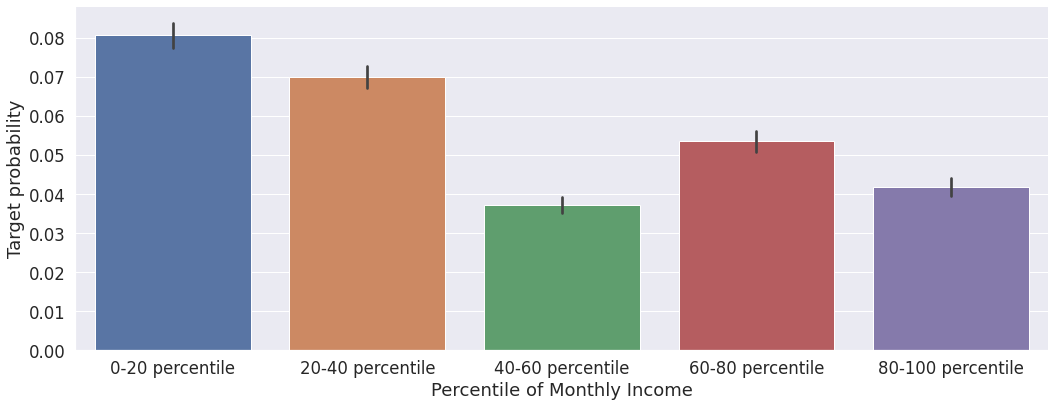

In [ ]:
g  = sns.factorplot(x="MonthlyIncome",y="Target",data=train,kind="bar",height=6,aspect=15/6)
g = g.set_ylabels("Target probability")
g = g.set_xlabels("Percentile of Monthly Income")

We can infer from the graphs, that as the monthly income increases, target probability decreases. 

## Exploring OpenCredit

In [ ]:
train.OpenCredit.describe()

count    146473.000000
mean          8.460290
std           5.086106
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: OpenCredit, dtype: float64

In [ ]:
train.OpenCredit = pd.qcut(train.OpenCredit.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

Applying same qcut operation on test data set.

In [ ]:
test.OpenCredit = pd.qcut(test.OpenCredit.values, 5, labels=["0-20 percentile","20-40 percentile","40-60 percentile","60-80 percentile","80-100 percentile"])

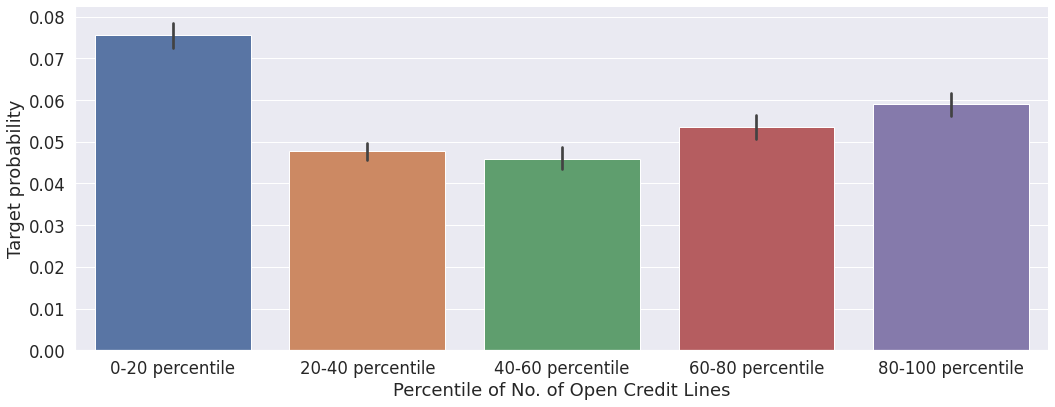

In [ ]:
g  = sns.factorplot(x="OpenCredit",y="Target",data=train,kind="bar", height=6,aspect=15/6)
g = g.set_ylabels("Target probability")
g = g.set_xlabels("Percentile of No. of Open Credit Lines")

From the above graph, we can infer that target probability is high at the extreme points, and low at middle points. This is quite understandable that bank only gives loans to their existing customers and to only those customers who dont have many loans on them.

## Exploring Late90

In [ ]:
train.Late90.describe()

count    146473.000000
mean          0.060018
std           0.378964
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: Late90, dtype: float64

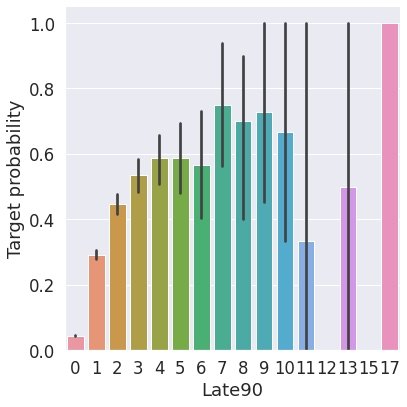

In [ ]:
g  = sns.factorplot(x="Late90",y="Target",data=train,kind="bar", size = 6)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(train)):
    if train.Late90[i] >= 7:
        train.Late90[i] = 7

Applying same operation on test data set

In [ ]:
for i in range(len(test)):
    if test.Late90[i] >= 7:
        test.Late90[i] = 7

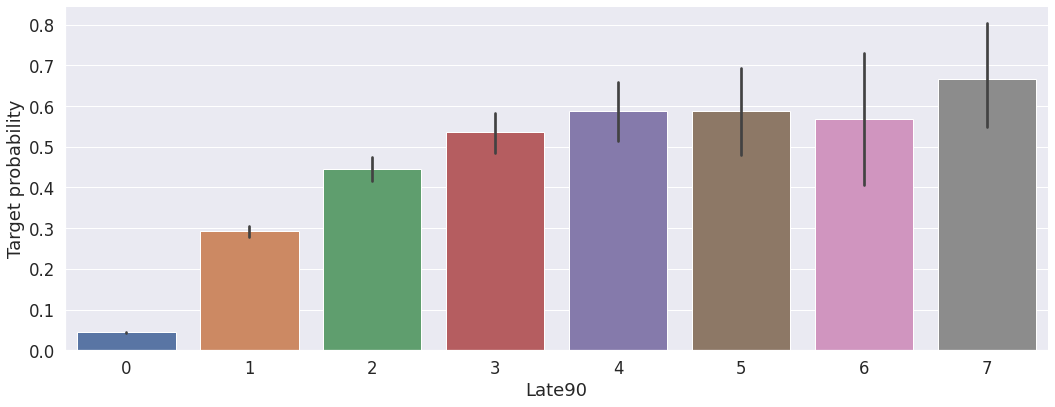

In [ ]:
g  = sns.factorplot(x="Late90",y="Target",data=train,kind="bar",height=6,aspect=15/6)
g = g.set_ylabels("Target probability")


Due to very high standard deviations we decided to group customers who have 7 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late90.

## Exploring PropLines

In [ ]:
train.PropLines.describe()

count    146473.000000
mean          1.014139
std           1.080874
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: PropLines, dtype: float64

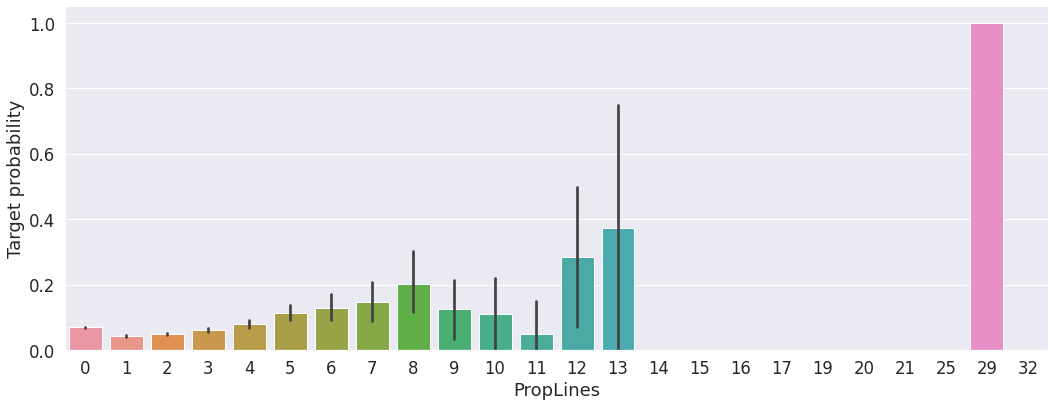

In [ ]:
g  = sns.factorplot(x="PropLines",y="Target",data=train,kind="bar", height=6, aspect=15/6)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(train)):
    if train.PropLines[i] >= 6:
        train.PropLines[i] = 6

Applying same operation on test data set

In [ ]:
for i in range(len(test)):
    if test.PropLines[i] >= 6:
        test.PropLines[i] = 6

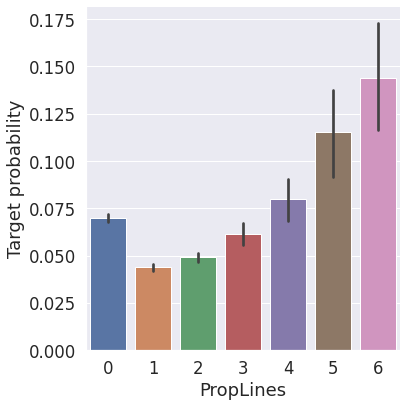

In [ ]:
g  = sns.factorplot(x="PropLines",y="Target",data=train,kind="bar", size=6)
g = g.set_ylabels("Target probability")

Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of PropLines.

From the graph, we can see that target probability increases as the no of open property lines increases. This we can understand as it is difficult for person to give loan amount as he/she has many other properties on loan also.

## Exploring Late6089

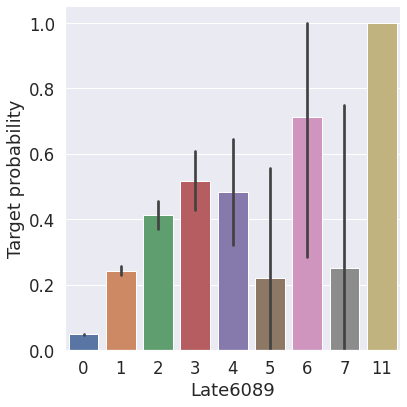

In [ ]:
g  = sns.factorplot(x="Late6089",y="Target",data=train,kind="bar", size = 6)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(train)):
    if train.Late6089[i] >= 3:
        train.Late6089[i] = 3

Applying same operation on test data set

In [ ]:
for i in range(len(test)):
    if test.Late6089[i] >= 3:
        test.Late6089[i] = 3

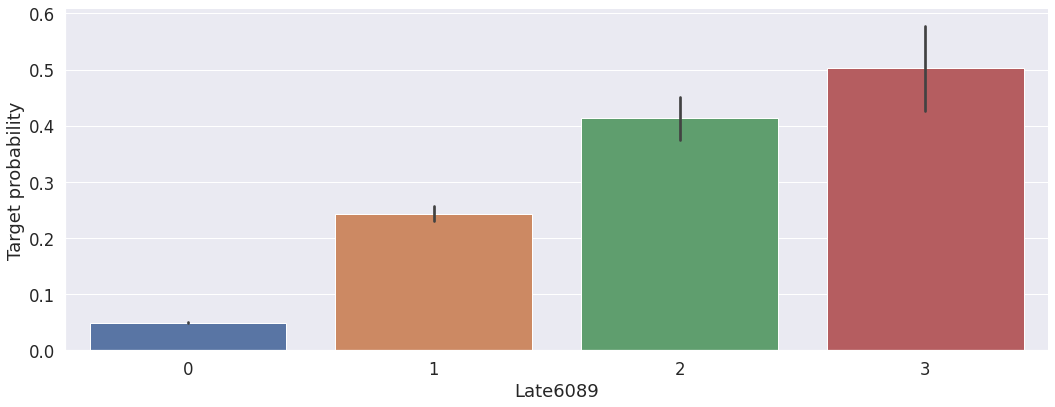

In [ ]:
g  = sns.factorplot(x="Late6089",y="Target",data=train,kind="bar", height=6, aspect=15/6)
g = g.set_ylabels("Target probability")

Due to very high standard deviations we decided to group customers who have 3 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late6089.

## Exploring Deps

In [ ]:
train.Deps.describe()

count    142707.000000
mean          0.756375
std           1.113671
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: Deps, dtype: float64

In [ ]:
train.Deps.isnull().sum()

3766

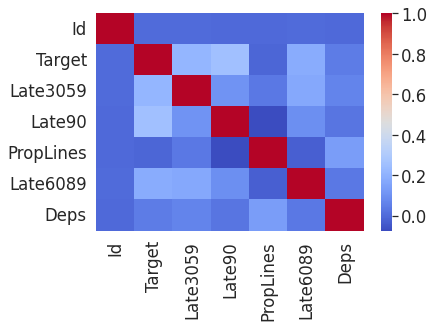

In [ ]:
g = sns.heatmap(train.corr(),fmt = ".2f", cmap = "coolwarm")

We can see that Deps has no strong correlation with any other variable so we cannot accurately estimate the NaN values. Thus, we will fill the NaN with the median value

In [ ]:
train.Deps = train.Deps.fillna(train.Deps.median())

Applying same operation on test data set

In [ ]:
test.Deps = test.Deps.fillna(test.Deps.median())

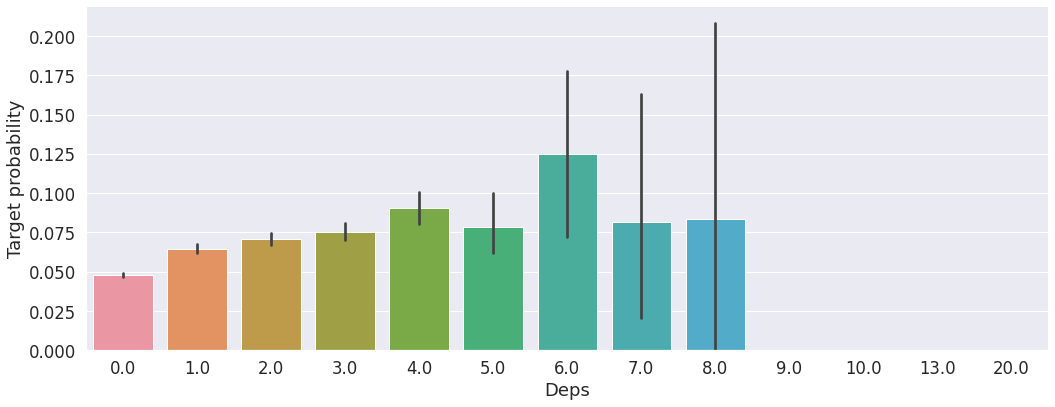

In [ ]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=train,kind="bar", height = 6, aspect=15/6)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(train)):
    if train.Deps[i] >= 4:
        train.Deps[i] = 4

Applying same operation on test data set

In [ ]:
for i in range(len(test)):
    if test.Deps[i] >= 4:
        test.Deps[i] = 4

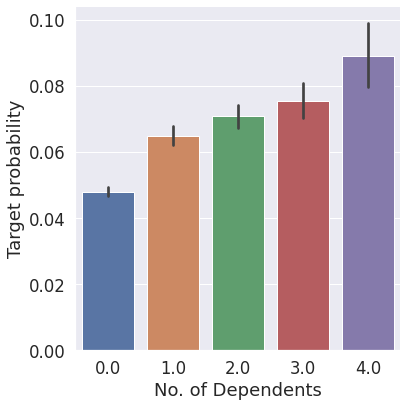

In [ ]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=train,kind="bar", size = 6)
g = g.set_ylabels("Target probability")
g = g.set_xlabels("No. of Dependents")

## Final Summary check

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146473 entries, 0 to 146472
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Id             146473 non-null  int64   
 1   Target         146473 non-null  int64   
 2   UnsecLines     146473 non-null  category
 3   age            146473 non-null  category
 4   Late3059       146473 non-null  int64   
 5   DebtRatio      146473 non-null  category
 6   MonthlyIncome  146473 non-null  category
 7   OpenCredit     146473 non-null  category
 8   Late90         146473 non-null  int64   
 9   PropLines      146473 non-null  int64   
 10  Late6089       146473 non-null  int64   
 11  Deps           146473 non-null  float64 
dtypes: category(5), float64(1), int64(6)
memory usage: 8.5 MB


In [ ]:
train.head()

,Id,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1,1,80-100 percentile,20-40 percentile,2,60-80 percentile,80-100 percentile,80-100 percentile,0,6,0,2.0
1,2,0,80-100 percentile,20-40 percentile,0,Debt-Ratio: 0-20 percentile,0-20 percentile,0-20 percentile,0,0,0,1.0
2,3,0,60-80 percentile,Age: 0-20 percentile,1,Debt-Ratio: 0-20 percentile,0-20 percentile,0-20 percentile,1,0,0,0.0
3,4,0,40-60 percentile,Age: 0-20 percentile,0,Debt-Ratio: 0-20 percentile,0-20 percentile,20-40 percentile,0,0,0,0.0
4,5,0,80-100 percentile,40-60 percentile,1,Debt-Ratio: 0-20 percentile,80-100 percentile,20-40 percentile,0,1,0,0.0


Building binary/dummy variables

In [ ]:
train = pd.get_dummies(train, columns = ["UnsecLines"], prefix="UnsecLines")
train = pd.get_dummies(train, columns = ["age"], prefix="age")
train = pd.get_dummies(train, columns = ["Late3059"], prefix="Late3059")
train = pd.get_dummies(train, columns = ["DebtRatio"], prefix="DebtRatio")
train = pd.get_dummies(train, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
train = pd.get_dummies(train, columns = ["OpenCredit"], prefix="OpenCredit")
train = pd.get_dummies(train, columns = ["Late90"], prefix="Late90")
train = pd.get_dummies(train, columns = ["PropLines"], prefix="PropLines")
train = pd.get_dummies(train, columns = ["Late6089"], prefix="Late6089")
train = pd.get_dummies(train, columns = ["Deps"], prefix="Deps")

In [ ]:
test = pd.get_dummies(test, columns = ["UnsecLines"], prefix="UnsecLines")
test = pd.get_dummies(test, columns = ["age"], prefix="age")
test = pd.get_dummies(test, columns = ["Late3059"], prefix="Late3059")
test = pd.get_dummies(test, columns = ["DebtRatio"], prefix="DebtRatio")
test = pd.get_dummies(test, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
test = pd.get_dummies(test, columns = ["OpenCredit"], prefix="OpenCredit")
test = pd.get_dummies(test, columns = ["Late90"], prefix="Late90")
test = pd.get_dummies(test, columns = ["PropLines"], prefix="PropLines")
test = pd.get_dummies(test, columns = ["Late6089"], prefix="Late6089")
test = pd.get_dummies(test, columns = ["Deps"], prefix="Deps")

In [ ]:
train.head()

,Id,Target,UnsecLines_0-20 percentile,UnsecLines_20-40 percentile,UnsecLines_40-60 percentile,UnsecLines_60-80 percentile,UnsecLines_80-100 percentile,age_Age: 0-20 percentile,age_20-40 percentile,age_40-60 percentile,age_60-80 percentile,age_80-100 percentile,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_Debt-Ratio: 0-20 percentile,DebtRatio_20-40 percentile,DebtRatio_40-60 percentile,DebtRatio_60-80 percentile,DebtRatio_80-100 percentile,MonthlyIncome_0-20 percentile,MonthlyIncome_20-40 percentile,MonthlyIncome_40-60 percentile,MonthlyIncome_60-80 percentile,MonthlyIncome_80-100 percentile,OpenCredit_0-20 percentile,OpenCredit_20-40 percentile,OpenCredit_40-60 percentile,OpenCredit_60-80 percentile,OpenCredit_80-100 percentile,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,Late90_6,Late90_7,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
test.head()

,Id,Target,UnsecLines_0-20 percentile,UnsecLines_20-40 percentile,UnsecLines_40-60 percentile,UnsecLines_60-80 percentile,UnsecLines_80-100 percentile,age_Age: 0-20 percentile,age_20-40 percentile,age_40-60 percentile,age_60-80 percentile,age_80-100 percentile,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_Debt-Ratio: 0-20 percentile,DebtRatio_20-40 percentile,DebtRatio_40-60 percentile,DebtRatio_60-80 percentile,DebtRatio_80-100 percentile,MonthlyIncome_0-20 percentile,MonthlyIncome_20-40 percentile,MonthlyIncome_40-60 percentile,MonthlyIncome_60-80 percentile,MonthlyIncome_80-100 percentile,OpenCredit_0-20 percentile,OpenCredit_20-40 percentile,OpenCredit_40-60 percentile,OpenCredit_60-80 percentile,OpenCredit_80-100 percentile,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,Late90_6,Late90_7,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1,NaN,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,NaN,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,3,NaN,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,NaN,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,NaN,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


With this, all the NaN values are treated and dummy variables are created.

## Building our credit scoring model

In [ ]:
train["Target"] = train["Target"].astype(int)
Y_train = train["Target"]
X_train = train.drop(labels = ["Target", "Id"],axis = 1)

In [ ]:
parameters = {'n_estimators': 200, 'random_state' : 0}
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

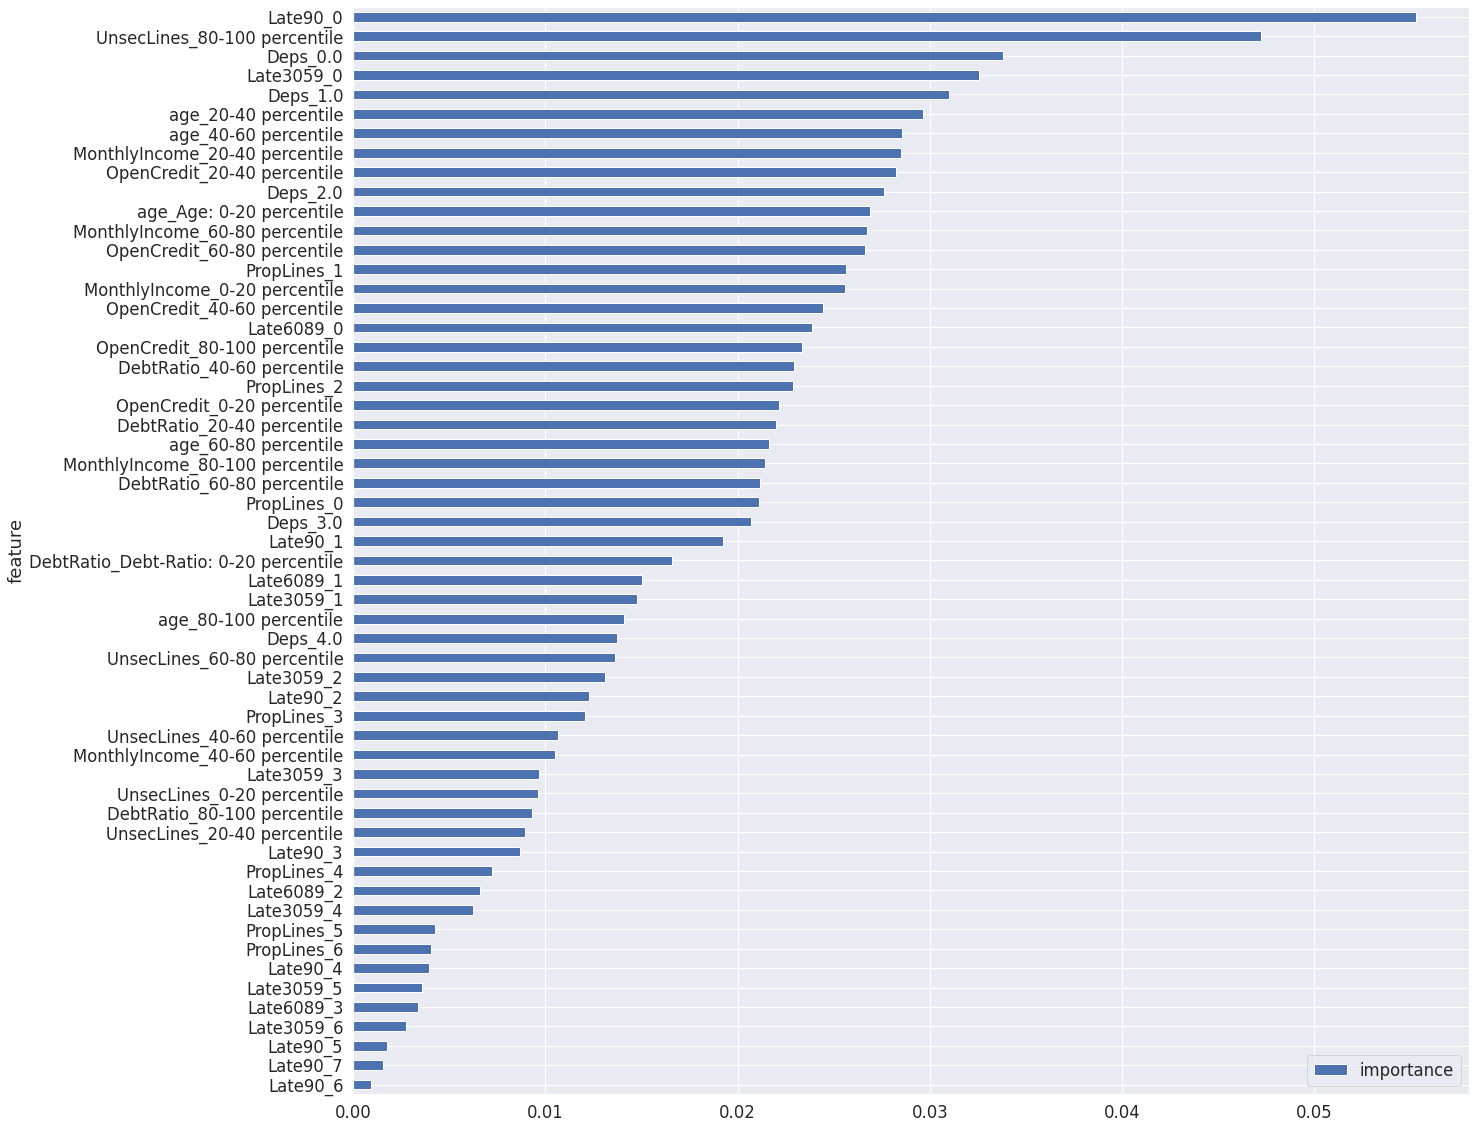

In [ ]:
features.plot(kind='barh', figsize=(20, 20))

In [ ]:
test.head()

,Id,Target,UnsecLines_0-20 percentile,UnsecLines_20-40 percentile,UnsecLines_40-60 percentile,UnsecLines_60-80 percentile,UnsecLines_80-100 percentile,age_Age: 0-20 percentile,age_20-40 percentile,age_40-60 percentile,age_60-80 percentile,age_80-100 percentile,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_Debt-Ratio: 0-20 percentile,DebtRatio_20-40 percentile,DebtRatio_40-60 percentile,DebtRatio_60-80 percentile,DebtRatio_80-100 percentile,MonthlyIncome_0-20 percentile,MonthlyIncome_20-40 percentile,MonthlyIncome_40-60 percentile,MonthlyIncome_60-80 percentile,MonthlyIncome_80-100 percentile,OpenCredit_0-20 percentile,OpenCredit_20-40 percentile,OpenCredit_40-60 percentile,OpenCredit_60-80 percentile,OpenCredit_80-100 percentile,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,Late90_6,Late90_7,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1,NaN,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,NaN,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,3,NaN,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,NaN,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,NaN,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
test.drop(labels=["Target"],axis = 1,inplace=True)

In [ ]:
result = model.predict(test.drop(["Id"], axis=1))

In [ ]:
test['Probability']=result

In [ ]:
Final=test[['Id','Probability']]

In [ ]:
Final['Probability'].value_counts()

0    99071
1     2432
Name: Probability, dtype: int64

In [ ]:
metrics.confusion_matrix(Y_train, model.predict(X_train))

array([[137950,    226],
       [  4226,   4071]])

In [ ]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    138176
           1       0.95      0.49      0.65      8297

    accuracy                           0.97    146473
   macro avg       0.96      0.74      0.82    146473
weighted avg       0.97      0.97      0.96    146473



This model lead to an accuracy rate of approximately 80 percent on Kaggle's unseen test data.

I deem this accuracy rate to be acceptable given that we used a relatively simple quantile based approach. 

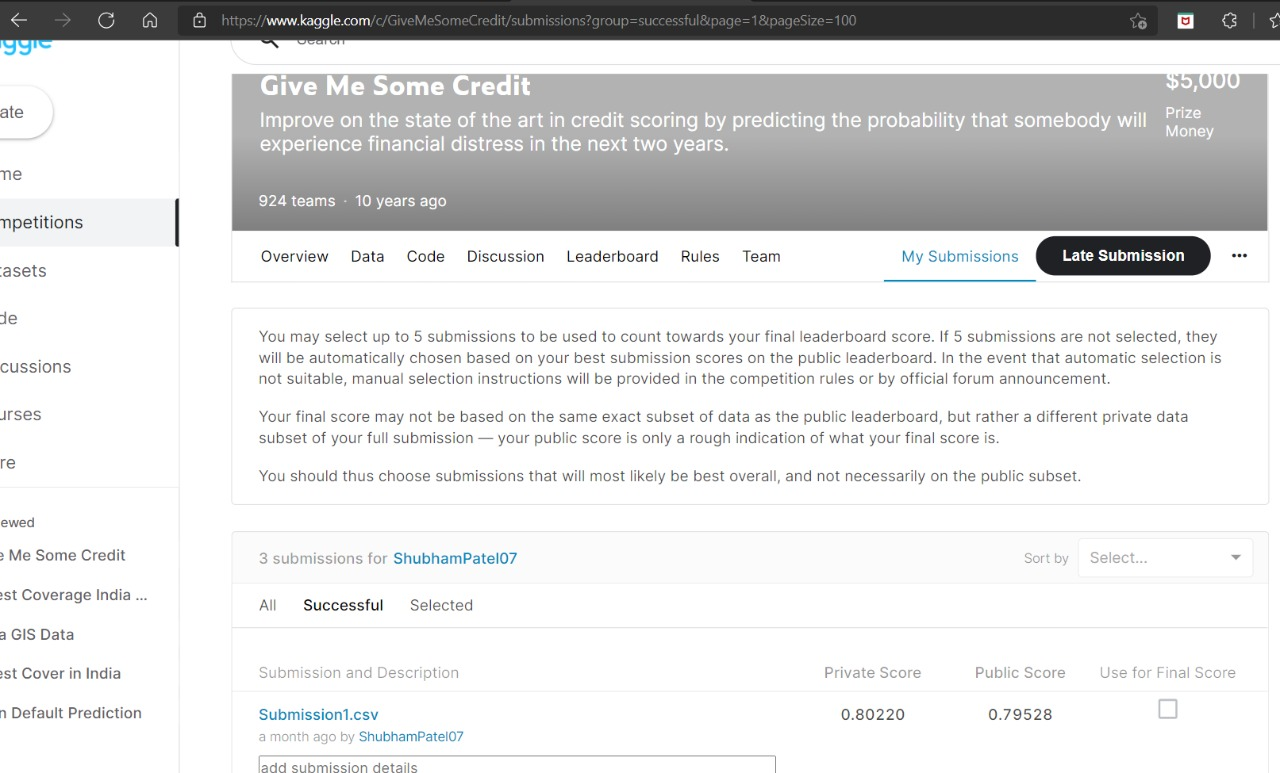

Now, we can take Credit History = [1 - (value of probability of financial distress)] for our next part of the project as bank would only give loan to those customers which are least likely to face any financial distress. Our next part of project uses logistic regression to predict that whether customer will be given loan or not.

---
# Part B
## Loan Eligibility prediction
This model uses a Kaggle dataset containing data about loan status of customers.
Many companies deal in all home loans. Most of them have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

A company wants to automate the loan eligibility process (real-time) based on customer details. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. The variables are as following:

---

**Gender**	Male/ Female

**Married**	Applicant married (Y/N)

**Dependents**	Number of dependents in family excluding themselves (spouse, children etc.)

**Education**	Applicant Education (Graduate/ Under Graduate)

**Self_Employed**	Self-employed (Y/N)

**ApplicantIncome**	Applicant income

**CoapplicantIncome**	Coapplicant income

**LoanAmount**	Loan amount in thousands

**Loan_Amount_Term**	Term of a loan in months

**Credit_History**	credit history meets guidelines

**Property_Area**	Urban/ Semi-Urban/ Rural

**Loan_Status**	Loan approved (Y/N)

---


##Exploratory Data Analysis

###Reading both training and testing set and exploring the data set

In [ ]:
train = pd.read_csv("loan-train.csv")

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.shape

(614, 13)

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##Target Distribution

Text(0, 0.5, 'Frequency')

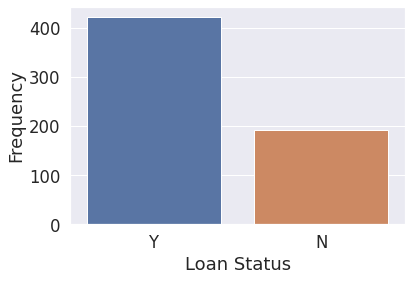

In [ ]:
ax = sns.countplot(x = train.Loan_Status)
sns.set(font_scale=1.5)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Frequency')

From the above graph, we can infer that number of people eligibile for loan are more than twice the number of people not eligible for loan.

## Exploring Gender

Treating missing variables

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

Univariate analysis

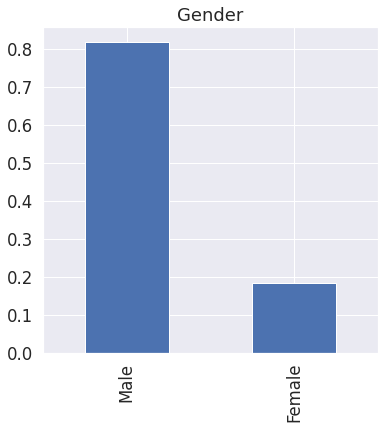

In [ ]:
#univariate analysis
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Gender')

From above, we can infer that, 80% of the applicants are males.

Bivariate analysis

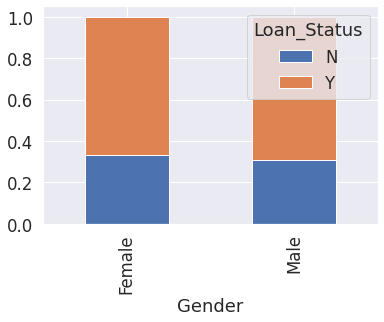

In [ ]:
#bivariate analysis
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Here it can be seen that proportion of approval or denial of loan for male or females is more or less same.

##Exploring Marital Status

Treating missing values

In [ ]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

Univariate analysis

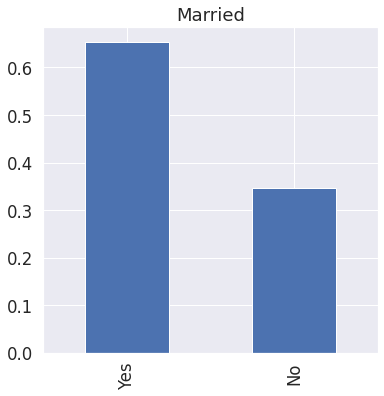

In [ ]:
#univariate analysis
train['Married'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Married')

From above, we can say that around 65% of the applicants are married.

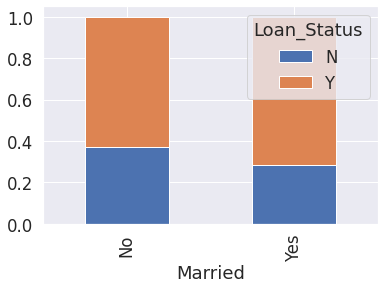

In [ ]:
#bivariate analysis
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

From above, we can infer that Proportion of married applicants is higher for approved loans.

##Exploring Self employment status

Treating Missing values

In [ ]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

Univariate analysis

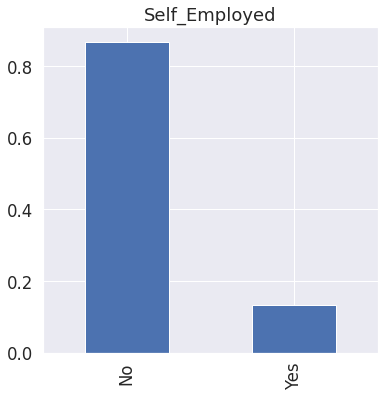

In [ ]:
#univariate analysis
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Self_Employed')

From above, we can say that around 3.15% of the applicants are self-Employed.

Bivariate analysis

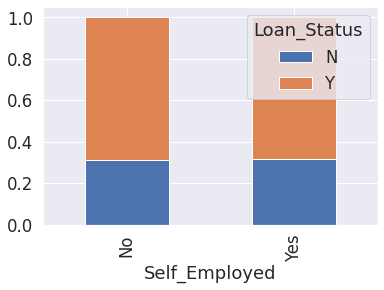

In [ ]:
#bivariate analysis
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

There is nothing significant we can infer from self_employed

##Exploring Education

Univariate analysis

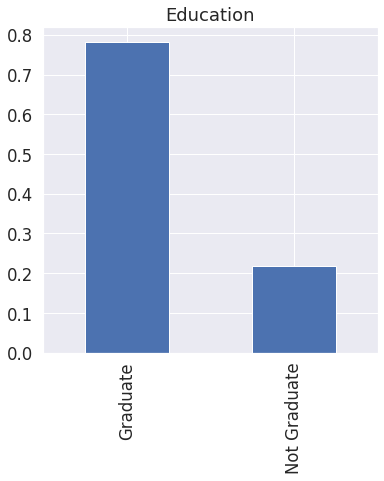

In [ ]:
#univariate analysis
train['Education'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Education')

We can say that around 80% of the applicants are graduate.

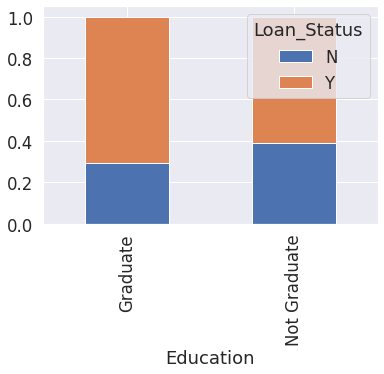

In [ ]:
#bivariate analysis
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

From above, we can say that Graduate applicants have higher chance of getting loan.

##Exploring Number of Dependents

Treating missing values

In [ ]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

Univariate Analysis

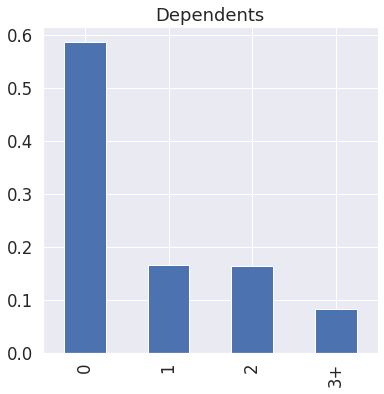

In [ ]:
#univariate analysis
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Dependents')

From above, we can understand that most of the applicants don't have dependents.

Bivariate Analysis

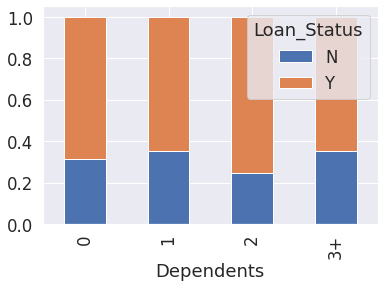

In [ ]:
#bivariate analysis
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status, while applicants with 2 dependents have highest chances of getting loan

##Exploring Property Area

Univariate Analysis

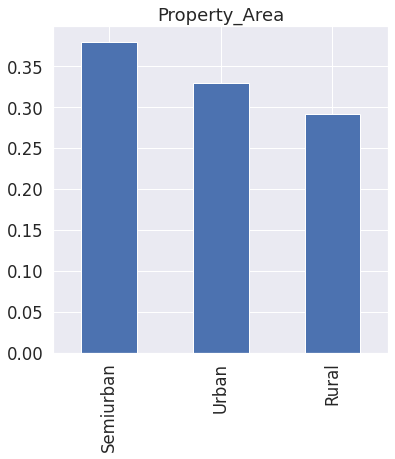

In [ ]:
#univariate analysis
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Property_Area')

Most of the applicants are from semiurban area.

Bivariate Analysis

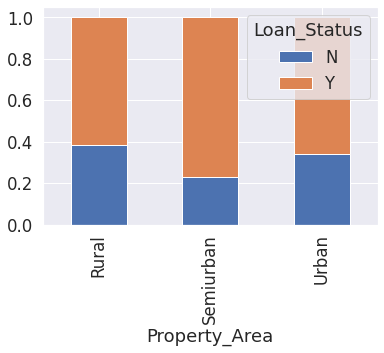

In [ ]:
#bivariate analysis
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Applicants with semi urban area are most likely to get loan

##Exploring Loan Amount

Treating missing values

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

Univariate Analysis

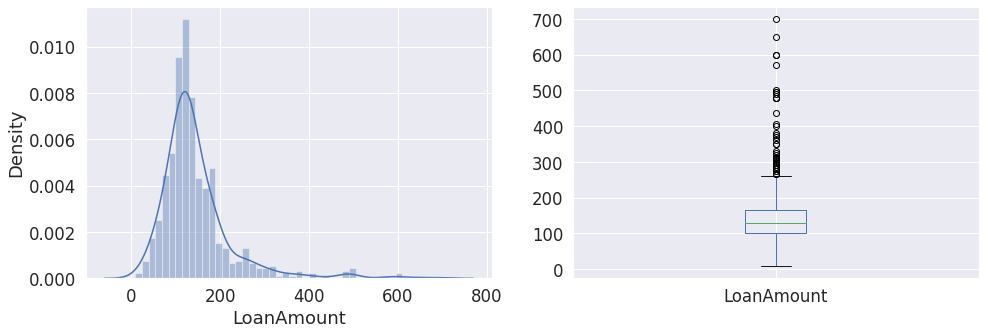

In [ ]:
#univariate analysis
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Due to outliers bulk of data in the loan amount is at athe left and the right tail is longer. So there is right skewness. One way to remove the skewness is by doing the log transformation.It reduces larger values.So, we get a distribution similar to normal distribution

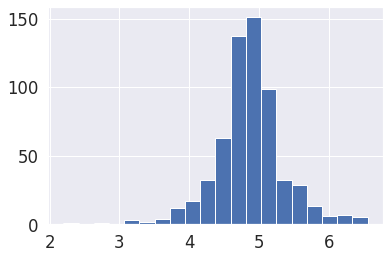

In [ ]:
train['LoanAmount']=np.log(train['LoanAmount'])
train['LoanAmount'].hist(bins=20)

Now, we can see that distribution is similar to normal distribution.

Bivariate Analysis

Text(0, 0.5, 'Percentage')

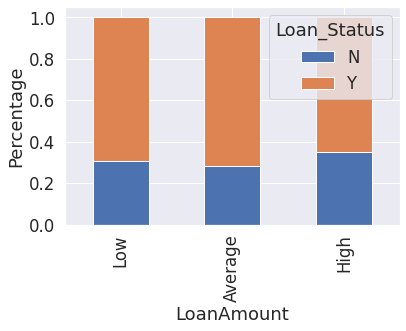

In [ ]:
group=['Low','Average','High']
train['LoanAmount']=pd.qcut(train['LoanAmount'],3,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

From above graph, we can say that proportion of approved loans is higher for low and average loan amount as compared to high loan amount which supports our hypothesis

##Exploring Credit History

Treating Missing Values

In [ ]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

Univariate analysis

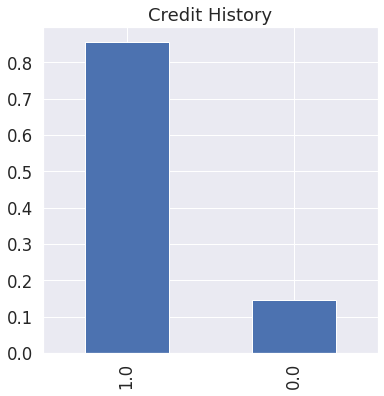

In [ ]:
#univariate analysis
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(6,6),title='Credit History')

85% of the applicants are less likely to face any financial distress for upcoming time.

Bivariate analysis

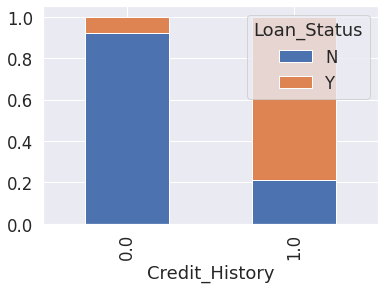

In [ ]:
#bivariate analysis
Dependents=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Applicants with credit hsitory as 1 are most likely to get loan.

##Exploring Loan Amount Term

Univariate Analysis

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can seen that in loan amount term variable, the value 360 is repeating the most.So we will replace the missing value in this variable using mode of this variable

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

Text(0, 0.5, 'Percentage')

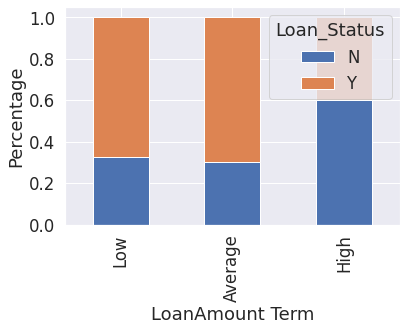

In [ ]:
group=['Low','Average','High']
bins=[12,180,360,480]
train['Loan_Amount_Term']=pd.cut(train['Loan_Amount_Term'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount Term')
plt.ylabel('Percentage')

From the graph, we can say that higher the loan amount, lesser the chance of getting loan

##Exploring Applicant Income and Coapplicant Income

Univariate Analysis

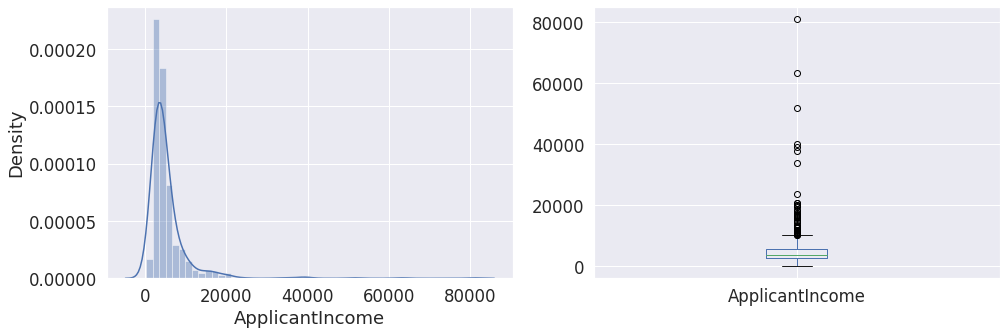

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Most of the data is towards left means data is not normally distributed.

Bu the box plot indicates presence of lot of outliers/extreme values. This can be attributed to income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

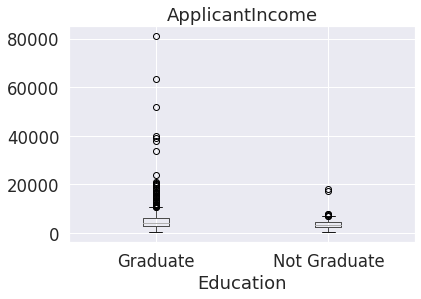

In [ ]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

We can say that there are higher number of graduates with very high incomes, which are appearing to be outliers.

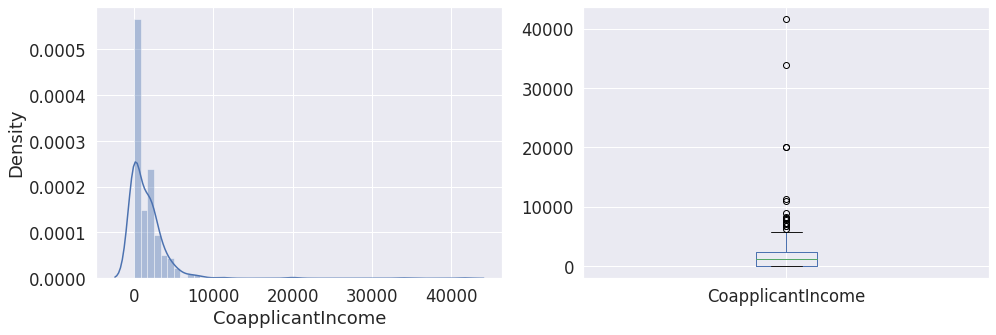

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Here similar distribution as that of applicantIncome is seen.

Also there are lot of outliers are present in CoapplicantIncome and it is also not normally distributed.

Text(0, 0.5, 'Percentage')

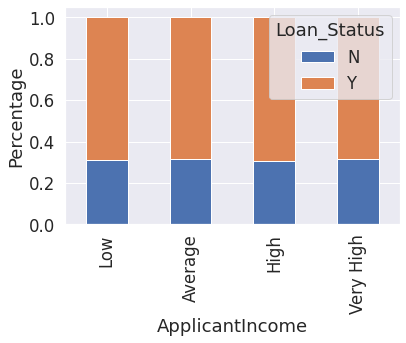

In [ ]:
group=['Low','Average','High','Very High']
train['Income_bin']=pd.qcut(train['ApplicantIncome'],4,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Here can be seen that applicants income do not affect loan status so our hypothesis contradicts here.

Text(0, 0.5, 'Percentage')

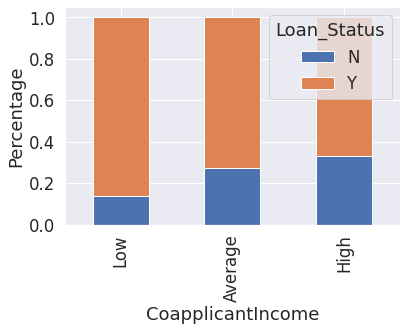

In [ ]:
group=['Low','Average','High']
bins=[0,1000,3000,42000] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if income is less chances of laon approval is very high but it is not true. Because most of the applicant dont have coapplicant which means coapplicant income is zero.So we can make anew variable to see combine effect on loan approval.

Text(0, 0.5, 'Percentage')

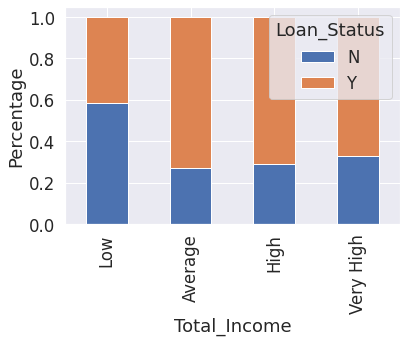

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
group=['Low','Average','High','Very High']
bins=[0,2500,4000,6000,81000] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Now it is clear that people with less income have less chances of loan approval as compared to other income categories.

Applying same for test data set

##Final NaN Check

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,Average,Average,1.0,Urban,Y,Very High,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,Average,Average,1.0,Rural,N,High,Average,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,Low,Average,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,Average,Average,1.0,Urban,Y,Low,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,Average,Average,1.0,Urban,Y,Very High,NaN,6000.0,High


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Loan_ID                 614 non-null    object  
 1   Gender                  614 non-null    object  
 2   Married                 614 non-null    object  
 3   Dependents              614 non-null    object  
 4   Education               614 non-null    object  
 5   Self_Employed           614 non-null    object  
 6   ApplicantIncome         614 non-null    int64   
 7   CoapplicantIncome       614 non-null    float64 
 8   LoanAmount              614 non-null    category
 9   Loan_Amount_Term        613 non-null    category
 10  Credit_History          614 non-null    float64 
 11  Property_Area           614 non-null    object  
 12  Loan_Status             614 non-null    object  
 13  Income_bin              614 non-null    category
 14  Coapplicant_Income_bin  34

In [ ]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            1
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
dtype: int64

Converting characters to integer for better results

In [ ]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

Deleting unwanted columns

In [ ]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','Income_bin','Coapplicant_Income_bin','Total_Income'],axis=1)

##Building our Loan Elgibility Model

In [ ]:
train=train.drop('Loan_ID',axis=1)

Now make dummy variable for the categorical variables.Dummy variable turns categorical variables into series of 0 and 1,making them easier to compare and quantify, as logistic regression takes only numerical values as input

In [ ]:
train=pd.get_dummies(train)

Now divide the train dataset into two parts:train and validation. We can make predictions on validation part and train the model on train part

In [ ]:
x_train,x_t2,y_train,y_t2v=train_test_split(train.drop('Loan_Status',1),train.Loan_Status,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv=model.predict(x_t2)

In [ ]:
accuracy_score(y_t2v,pred_cv)

0.8536585365853658

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train).predict(x_t2)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
nb_pred = gnb.predict(x_t2)

In [ ]:
accuracy_score(y_t2v,nb_pred)

0.8292682926829268

In [ ]:
xclf1 = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
xclf1.fit(x_train, y_train)
# booster='gbtree' so a tree is being used

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = xclf1.predict(x_t2)

In [ ]:
accuracy_score(y_t2v,xgb_pred)

0.8455284552845529

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes Classifier','XG Boost Classifier '], 
                         'Accuracy Score': [accuracy_score(y_t2v,pred_cv),accuracy_score(y_t2v,nb_pred),accuracy_score(y_t2v,xgb_pred)]})
model_ev

,Model,Accuracy Score
0,Logistic Regression,0.853659
1,Naive Bayes Classifier,0.829268
2,XG Boost Classifier,0.845528


## Thankyou